# **Theft in West Point Grey and Dunbar-Southlands**

**Group 34:** Andy Hu, Wendi Ke, CC Liang, and Mridul Manas

<img src="https://raw.githubusercontent.com/fankayii/STAT201_34/main/images/theft.jpg"/>

Source: https://raw.githubusercontent.com/fankayii/STAT201_34/main/images/theft.jpg

# 1. Introduction
Crime brings chills down everyone’s spines, with theft being the most common type of crime in Canada ([Government of Canada](https://www.justice.gc.ca/eng/cj-jp/state-etat/2019rpt-rap2019/p7.html)). Section 322 of the Canadian Criminal Code defines "theft" as "fraudulently and without colour of right" taking someone's property or converting its ownership ([Criminal Code](https://laws-lois.justice.gc.ca/eng/acts/c-46/section-322.html)). Understanding crime statistics is crucial to enhancing community relations, measuring prevention initiatives, and minimizing risks by making better decisions ([Vancouver Police Department](https://vpd.ca/crime-statistics/)). In this paper, we will study the proportion of theft crime in Dunbar-Southlands and West Point Grey, the two neighbourhoods closest to the University of British Columbia Vancouver campus ([UBC Vantage College](https://vantagecollege.ubc.ca/blog/your-guide-neighborhoods-vancouver)).

### Research Question
Is the proportion of theft occurring in the neighbourhood of West Point Grey higher than Dunbar-Southlands? 

### Variables
The random variable of interest for comparison is the proportion of theft in Dunbar-Southlands and West Point Grey. For the response variable, difference in proportions is the location parameter and standard error is the scale parameter.

### Hypotheses
- Null Hypothesis $H_0$: There is no difference between the proportion of theft in the neighbourhoods of Dunbar-Southlands and West Point Grey.
- Alternative Hypothesis $H_A$: The proportion of theft in West Point Grey is higher than in Dunbar-Southlands.

| Null Hypothesis $H_0$ | Alternate Hypothesis $H_A$ |
| --- | ----------- |
|  $$H_0: p_w - p_d = 0$$ | $$H_A: p_w - p_d > 0$$ |

### Dataset Description
To conduct our research, we use the [Vancouver Police Department (VPD) crime data](https://geodash.vpd.ca/opendata/), which includes information on the different types of crimes in Vancouver from 2003 to 2023. We will be focusing on crimes within the last 5 complete years, 2018 to 2022, in West Point Grey and Dunbar-Southlands to base our research upon more recent and contemporary crimes.

# 2. Methods and Results

### Exploratory Data Analysis

The `tidyverse`, `infer`, and `broom` packages allow us to clean and wrangle data, create visualizations, and make statistical inferences. 

In [1]:
library(tidyverse)
library(infer)
library(broom)

options(repr.plot.width = 10, repr.plot.height = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Since we uploaded the dataset to our GitHub repository, we can read the csv file from our GitHub link.

In [2]:
crime <- read.csv("https://raw.githubusercontent.com/fankayii/STAT201_34/main/data/crime.csv")
head(crime)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft from Vehicle,2008,12,7,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
2,Theft from Vehicle,2009,8,28,19,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
3,Theft from Vehicle,2012,7,25,12,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
4,Theft from Vehicle,2014,5,8,12,49,11XX E HASTINGS ST,Strathcona,494141.1,5458690
5,Theft from Vehicle,2014,10,19,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
6,Theft from Vehicle,2015,2,18,18,30,11XX E HASTINGS ST,Strathcona,494141.1,5458690


First, we check for any NA values in our dataset.

In [3]:
print(sum(is.na(crime)))
head(crime[!complete.cases(crime), ])

[1] 146


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
310264,Vehicle Collision or Pedestrian Struck (with Injury),2003,6,22,18,58,0X TERMINAL AV / QUEBEC ST,,NA,NA
311248,Vehicle Collision or Pedestrian Struck (with Injury),2004,11,7,18,24,13XX PACIFIC BLVD / 198 DRAKE ST,,NA,NA
311366,Vehicle Collision or Pedestrian Struck (with Injury),2003,9,20,17,15,14XX BLOCK S E MARINE DR,,NA,NA
311484,Vehicle Collision or Pedestrian Struck (with Injury),2003,8,31,21,3,14XX W KING EDWARD AV / GRANVILLE ST,,NA,NA
311596,Vehicle Collision or Pedestrian Struck (with Injury),2004,10,5,17,56,15XX BLOCK W 70TH AV / 8600 GRANVILLE ST,,NA,NA
311649,Vehicle Collision or Pedestrian Struck (with Injury),2003,5,30,18,0,15XX W 66TH AV / 8298 GRANVILLE ST,,NA,NA


We demonstrated removing the 164 NA values from X and Y below, but we decide to ignore them since they don't affect the neighbourhood and type columns, and only the X and Y longitudinal and latitudinal positions of the crimes.

In [4]:
na.omit(crime) %>% 
    head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft from Vehicle,2008,12,7,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
2,Theft from Vehicle,2009,8,28,19,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
3,Theft from Vehicle,2012,7,25,12,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
4,Theft from Vehicle,2014,5,8,12,49,11XX E HASTINGS ST,Strathcona,494141.1,5458690
5,Theft from Vehicle,2014,10,19,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
6,Theft from Vehicle,2015,2,18,18,30,11XX E HASTINGS ST,Strathcona,494141.1,5458690


Next, we filter for our years of interest

In [5]:
crime_overall_recent <- crime %>% 
    filter(YEAR >= 2018 & YEAR <= 2022) %>%
    select(TYPE, NEIGHBOURHOOD)

colnames(crime_overall_recent) <- c('type', 'neighbourhood')
head(crime_overall_recent)

,type,neighbourhood
,<chr>,<chr>
1,Theft from Vehicle,Strathcona
2,Theft from Vehicle,Strathcona
3,Theft from Vehicle,Strathcona
4,Theft from Vehicle,Strathcona
5,Theft from Vehicle,Strathcona
6,Theft from Vehicle,Strathcona


To study theft crime proportions, we will group all the different types of crime into exclusively one of `theft` or `not theft`.

In [6]:
crime_overall <- crime_overall_recent %>%
    mutate(type = case_when(
    type %in% c("Other Theft", "Theft from Vehicle", "Theft of Bicycle", "Theft of Vehicle") ~ "theft",
    TRUE ~ "not_theft"))

head(crime_overall)

,type,neighbourhood
,<chr>,<chr>
1,theft,Strathcona
2,theft,Strathcona
3,theft,Strathcona
4,theft,Strathcona
5,theft,Strathcona
6,theft,Strathcona


Let us visualize all our theft data below.

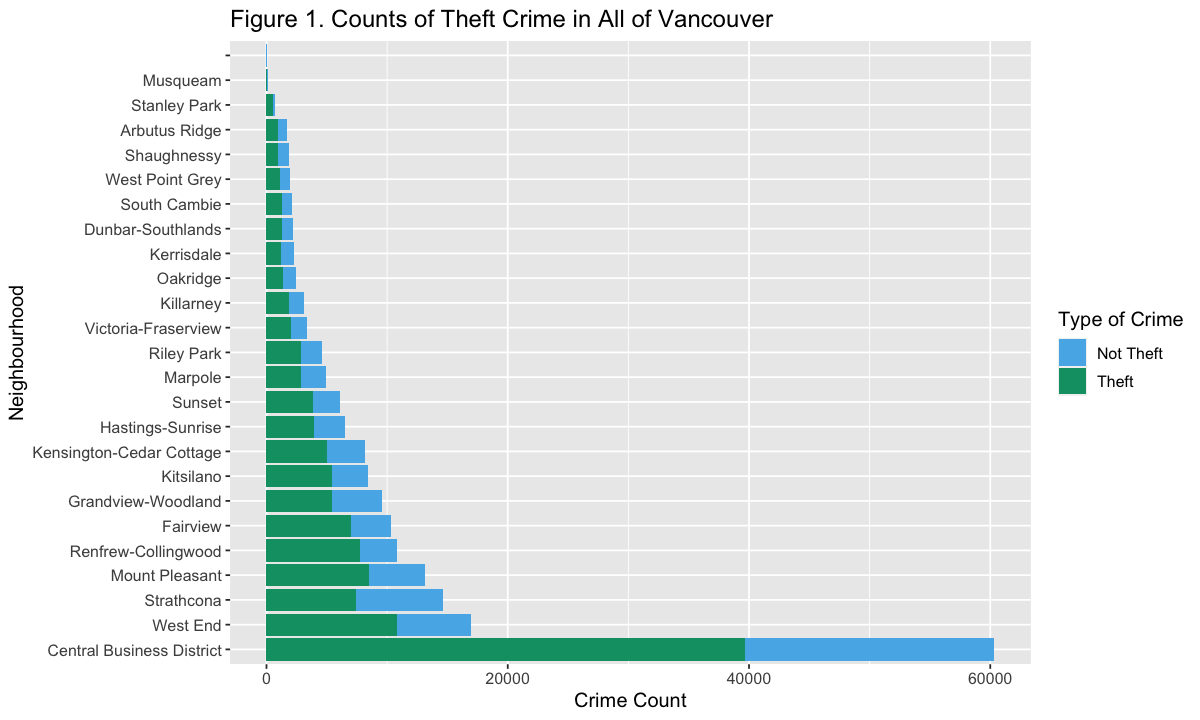

In [7]:
ggplot(crime_overall, aes(y = reorder(neighbourhood, -table(neighbourhood)[neighbourhood]), fill = type)) + 
    geom_bar() + 
    labs(x = "Crime Count",
         y = "Neighbourhood",
         fill = "Type of Crime",
         title = "Figure 1. Counts of Theft Crime in All of Vancouver") + 
    scale_fill_manual(labels = c('Not Theft', 'Theft'), values = c("#56B4E9", "#009E73")) + 
    theme(text = element_text(size = 12))

We quickly noticed Central Business District, the outlier, has way more crime than all other places in Vancouver. West Point Grey and Dunbar-Southlands have little crime in comparison, and their total crime count and proportion are pretty similar. Thus, it would be reasonable to use statistical inference on these two neighbourhoods for differences in theft proportion.

In [8]:
crime_stats <- crime_overall %>%
    group_by(neighbourhood, type) %>%
    summarize(count = n(), .groups = 'drop') %>%
    pivot_wider(names_from = type,
                values_from = count) %>%
    mutate(total_crime = not_theft + theft,
           prop = theft / total_crime)

crime_stats = crime_stats[-1, ]

crime_stats %>%
    filter(total_crime > 1700 & total_crime < 2400)

neighbourhood,not_theft,theft,total_crime,prop
<chr>,<int>,<int>,<int>,<dbl>
Arbutus Ridge,773,958,1731,0.5534373
Dunbar-Southlands,915,1250,2165,0.5773672
Kerrisdale,1031,1237,2268,0.5454145
Shaughnessy,936,957,1893,0.5055468
South Cambie,779,1319,2098,0.6286940
West Point Grey,801,1132,1933,0.5856182


We notice that West Point Grey and Dunbar-Southlands have a similar proportion of theft. Let us zoom in by filtering  for the two neighbourhoods.

In [9]:
crime_filtered <- crime_overall %>%
    filter(neighbourhood %in% c("West Point Grey","Dunbar-Southlands"))

head(crime_filtered)

,type,neighbourhood
,<chr>,<chr>
1,theft,West Point Grey
2,theft,West Point Grey
3,theft,West Point Grey
4,theft,West Point Grey
5,theft,West Point Grey
6,theft,West Point Grey


We then compute some initial observations about the filtered data and tidy it.

In [10]:
crime_type_pivot <- crime_filtered %>%
    group_by(neighbourhood, type) %>%
    summarize(count = n(), .groups = 'drop') %>%
    pivot_wider(names_from = type,
                values_from = count) %>%
    mutate(total_crime = not_theft + theft,
           prop = theft / total_crime)
    
crime_type_pivot

neighbourhood,not_theft,theft,total_crime,prop
<chr>,<int>,<int>,<int>,<dbl>
Dunbar-Southlands,915,1250,2165,0.5773672
West Point Grey,801,1132,1933,0.5856182


**Table 1. Initial observations of the crime data**

We can zoom in on the two bars pertaining to West Point Grey and Dunbar-Southlands as follows.

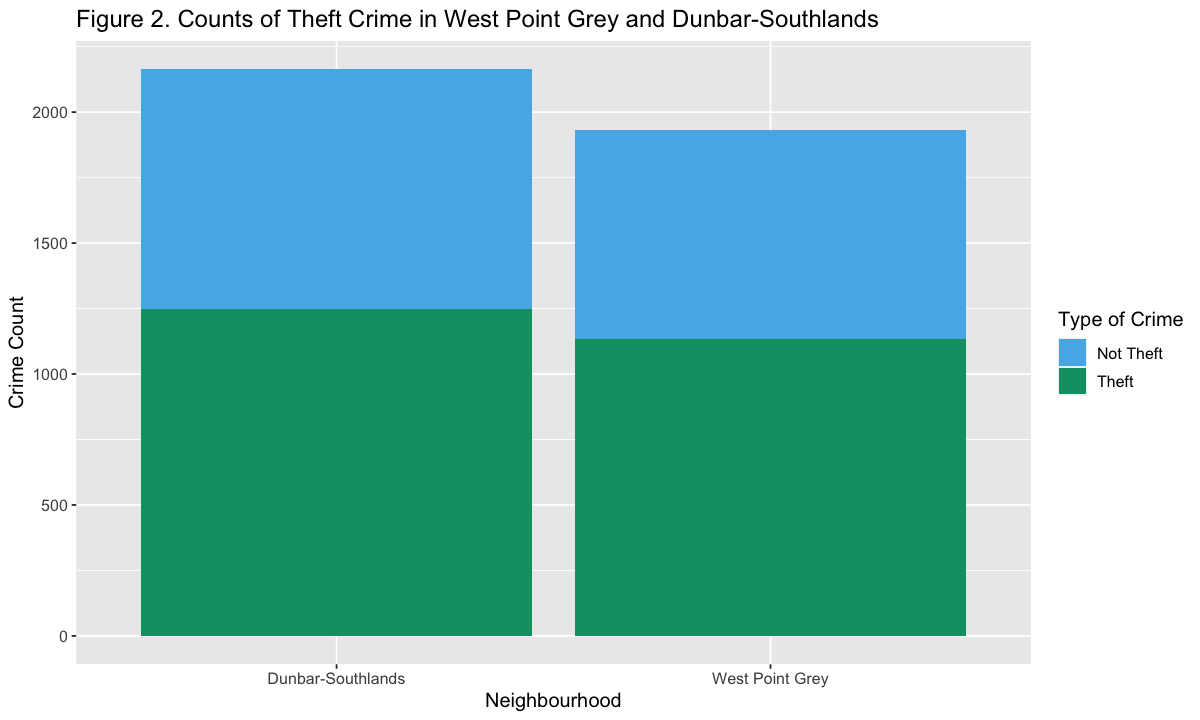

In [11]:
ggplot(crime_filtered, aes(x = neighbourhood, fill = type)) + 
    geom_bar() + 
    labs(x = "Neighbourhood",
         y = "Crime Count",
         fill = "Type of Crime",
         title = "Figure 2. Counts of Theft Crime in West Point Grey and Dunbar-Southlands") + 
    scale_fill_manual(labels = c('Not Theft', 'Theft'), values = c("#56B4E9", "#009E73")) + 
    theme(text = element_text(size = 12))

From the plot and table, we observe that the proportion of theft crime are similar for the two neighbourhoods. West Point Grey is slightly higher in proportions, although Dunbar-Southlands has a greater count. Also, for both neighbourhoods, theft is the majority type of crime.

We now calculate the observed test statistic $\hat{p}_1-\hat{p}_0$, which is the proportion of theft in West Point Grey subtracted by the proportion of theft in Dunbar-Southlands.

In [12]:
crime_estimates <- crime_type_pivot %>%
    select(neighbourhood, total_crime, prop) %>%
    pivot_wider(names_from = neighbourhood, values_from = c(total_crime, prop))

colnames(crime_estimates) <- c('n_ds', 'n_wpg', 'p_ds', 'p_wpg')

crime_estimates <- crime_estimates %>%
    mutate(prop_diff = p_wpg - p_ds)

crime_estimates

n_ds,n_wpg,p_ds,p_wpg,prop_diff
<int>,<int>,<dbl>,<dbl>,<dbl>
2165,1933,0.5773672,0.5856182,0.008251004


**Table 2. Crime estimates**

Based on the difference in proportions of 0.008251004 and the plot, we cannot easily conclude anything significant about the difference in proportions of theft in both neighbourhoods, meaning that we must use statistical inference.

### Methods

We will be using both asymptotics and bootstrapping to conduct our research to discover whether West Point Grey has a higher proportion of theft compared to Dunbar-Southlands. 

For asymptotics, we rely on the Central Limit Theorem because proportions do not follow a random distribution, meaning their distribution won't be normal. Therefore, we need to check for the large enough sample size condition, such that `n(1-p) >= 10` and `np >= 10`. We also need to assume that the sample is random and independent. By carrying out a two-sample independent z-test, we will use the test statistic:

$$
Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}.
$$

For bootstrapping, we will set a consistent seed to ensure data reproducibility. Afterwards, we take bootstrap samples from our crime dataset to create a bootstrap distribution for the difference in proportions.

For both approaches, we find the p-value to check for any statistically significant findings to decide whether we can reject the null hypothesis or not under a significance level of $\alpha = 0.05$. This also means a confidence level of 95% which we can construct using both methods to capture with a certain degree of confidence that the true difference in proportions falls within the interval.

### Results Using Asymptotics

We conduct a two-sample z-test to calculate the proportion difference. Recall that we already have the counts and proportions of crime in both neighbourhoods in `crime_estimates`.

In [13]:
crime_estimates

n_ds,n_wpg,p_ds,p_wpg,prop_diff
<int>,<int>,<dbl>,<dbl>,<dbl>
2165,1933,0.5773672,0.5856182,0.008251004


**Table 2. Crime estimates**

Since we are using theory-based methods, we check that `np >= 10` and `n(1-p) >= 10` for both neighbourhoods. We have $2165*0.5773672 \approx 1250 \geq 10$ and $2165*(1-0.0.5773672) \approx 915 \geq 10$ for Dunbar-Southlands. Likewise for West Point Grey, $1933*0.5856182 \approx 1130 \geq 10$ and $1933*0.5856182 \approx 800 \geq 10$. Aside from satisfying the 'success-failure' condition for a large enough sample size, We assume that the sample dataset is random and the data are independent of each other, so we can use the Central Limit Theorem.

We proceed to calculate the null distribution standard error by first calculating a pooled proportion. 

In [14]:
crime_asymptotics <- crime_estimates %>%
    mutate(pooled_proportion = (n_ds*p_ds + n_wpg*p_wpg) / (n_ds + n_wpg),
           null_std_error = sqrt(pooled_proportion * (1-pooled_proportion) * (1/n_ds + 1/n_wpg)))

crime_asymptotics

n_ds,n_wpg,p_ds,p_wpg,prop_diff,pooled_proportion,null_std_error
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2165,1933,0.5773672,0.5856182,0.008251004,0.5812592,0.01543827


**Table 3. Parameters calculated from asymptotics**

We can now easily find a 95% confidence interval using asymptotics.

In [15]:
obs_prop_diff_asymptotics <- crime_asymptotics$prop_diff
null_std_error <- crime_asymptotics$null_std_error

prop_ci_asymptotics <- tibble(
    lower_ci = qnorm(0.025, obs_prop_diff_asymptotics, null_std_error),
    upper_ci = qnorm(0.975, obs_prop_diff_asymptotics, null_std_error))

prop_ci_asymptotics

lower_ci,upper_ci
<dbl>,<dbl>
-0.02200745,0.03850946


**Table 4. Asymptotics Confidence Interval**

We note that 0 is included in the interval, meaning that is is likely that we fail to reject the null hypothesis. We can also visualize this confidence interval.

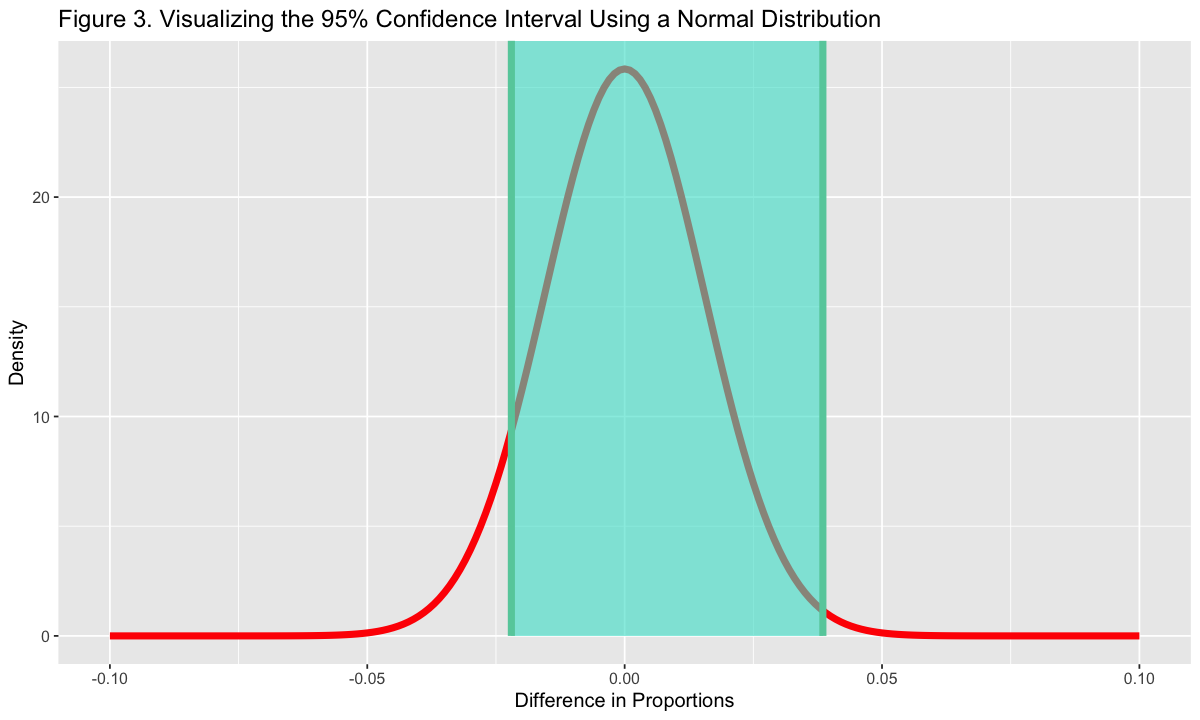

In [16]:
x = seq(-0.1, 0.1, by = 0.001)
y <- dnorm(x, 0, null_std_error)
normal_data <- tibble(x, y)

normal_data %>%
    ggplot(aes(x, y)) + 
    geom_line(color = 'red', lwd = 2) + 
    shade_confidence_interval(endpoints = prop_ci_asymptotics) + 
    labs(x = "Difference in Proportions",
         y = "Density",
         title = "Figure 3. Visualizing the 95% Confidence Interval Using a Normal Distribution")+ 
    theme(text = element_text(size = 12))

We are 95% confident that the true difference in proportions is captured by the confidence interval created using asymptotics.

Finally, we obtain the p-value.

In [17]:
p_value_asymptotics <- pnorm(obs_prop_diff_asymptotics, 0, null_std_error, lower.tail=F)
p_value_asymptotics

[1] 0.2965147

Clearly, the p-value above is greater than the significance level we set at 0.05, indicating that we fail to reject the null hypothesis.
We can visualize this result with a plot.

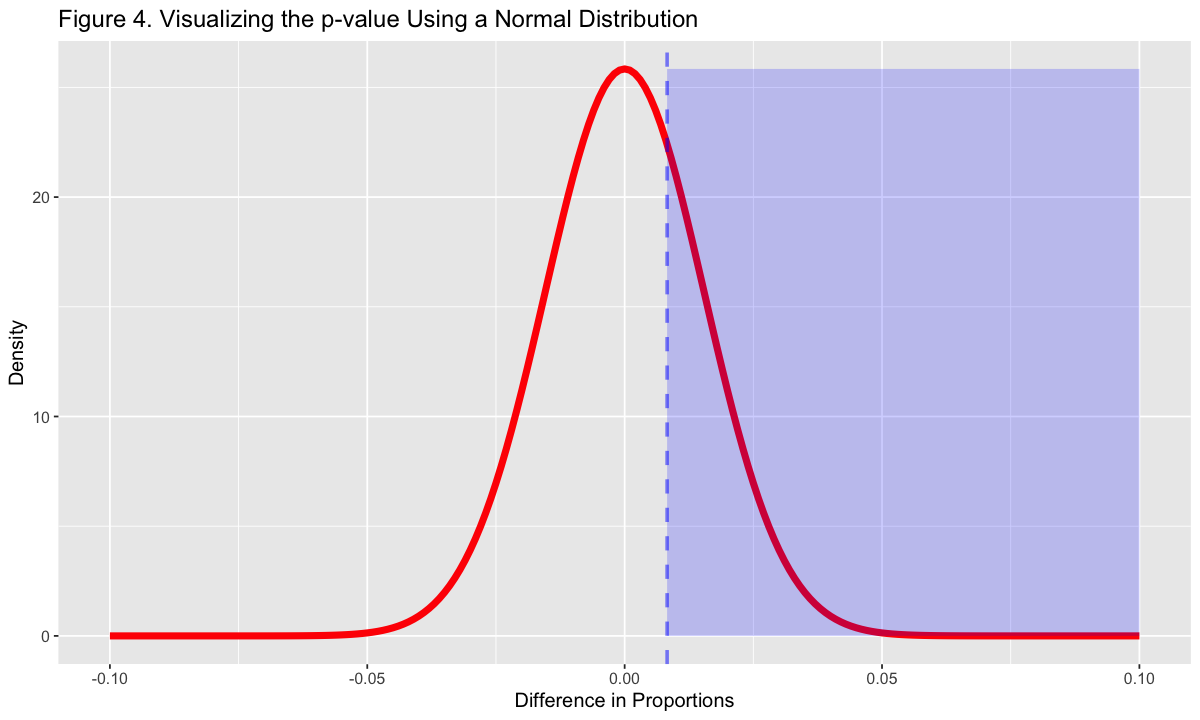

In [18]:
normal_data %>%
    ggplot(aes(x, y)) + 
    geom_line(color = 'red', lwd = 2) + 
    geom_ribbon(aes(xmin = obs_prop_diff_asymptotics,
                    xmax = max(x)),
                    alpha = 0.2,
                    fill = 'blue') + 
    geom_vline(xintercept = obs_prop_diff_asymptotics,
               lwd = 1, alpha = 0.5, color = 'blue', linetype = 'dashed') + 
    labs(x = "Difference in Proportions",
         y = "Density",
         title = "Figure 4. Visualizing the p-value Using a Normal Distribution") + 
    theme(text = element_text(size = 12))

We use `prop.test` to check our answer.

In [19]:
c_wpg <- crime_estimates$n_wpg * crime_estimates$p_wpg
c_ds <- crime_estimates$n_ds * crime_estimates$p_ds

prop_test <- tidy(
    prop.test(x = c(c_wpg, c_ds),
              n = c(crime_estimates$n_wpg, crime_estimates$n_ds),
              correct = FALSE,
              alternative = "greater"))
prop_test

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.5856182,0.5773672,0.2856382,0.2965147,1,-0.01713783,1,2-sample test for equality of proportions without continuity correction,greater


The p-value using asymptotics and prop.test gives us the same result, but we expect it to be slightly different from using the infer package.

### Results Using the Infer Package for Bootstrapping

We first obtain the null model after setting the seed to make the analysis reproducible. The response variable is `type` and the explanatory variable is `neighbourhood`. Assuming the samples are independent, we generate replicates of shuffled data with the `permute` argument. Recall that we are calculating a difference in proportions of West Point Grey subtracted by Dunbar-Southlands.

In [20]:
set.seed(1)

null_model <- crime_filtered %>%
    specify(type ~ neighbourhood, success = "theft") %>%
    hypothesise(null = "independence") %>%
    generate(reps = 2000, type = "permute") %>%
    calculate(stat = "diff in props", order = c("West Point Grey", "Dunbar-Southlands"))
head(null_model)

replicate,stat
<int>,<dbl>
1,-0.01622960
2,-0.02308417
3,0.02000170
4,-0.01329193
5,-0.02014650
6,-0.02798030


Now, we calculate the observed proportion difference, which should give the same answer as in `crime_estimates`

In [21]:
crime_estimates

n_ds,n_wpg,p_ds,p_wpg,prop_diff
<int>,<int>,<dbl>,<dbl>,<dbl>
2165,1933,0.5773672,0.5856182,0.008251004


**Table 2. Crime estimates**

In [22]:
obs_prop_diff <- crime_filtered %>%
    specify(type ~ neighbourhood, success = "theft") %>%
    calculate(stat = "diff in props", order = c("West Point Grey", "Dunbar-Southlands")) %>%
    pull()
obs_prop_diff

[1] 0.008251004

As expected, the observed difference in proportions match, so we move onto visualizing the simulation-based null distribution.

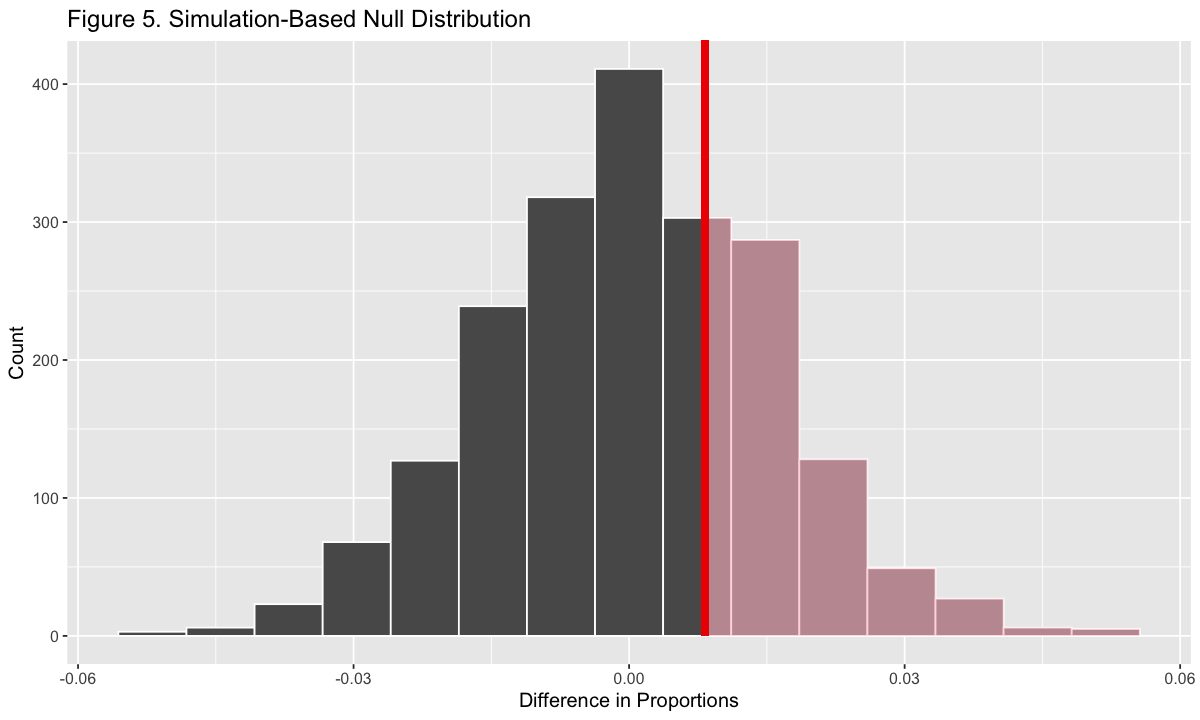

In [23]:
theft_result_plot <- 
   null_model %>%
   visualize() + 
   shade_p_value(obs_stat = obs_prop_diff, direction = "right") +
   labs(x = "Difference in Proportions",
        y = "Count",
       title = "Figure 5. Simulation-Based Null Distribution") + 
    theme(text = element_text(size = 12))
theft_result_plot

We can compute the p-value using `get_p_value`.

In [24]:
p_value_infer <- null_model %>%
    get_p_value(obs_stat = obs_prop_diff, direction = "right") %>%
    pull()
p_value_infer 

[1] 0.3185

Now, we will jump from conducting the hypothesis test to calculating a 95% confidence interval using the percentile and standard error method by bootstrapping from our crime sample.

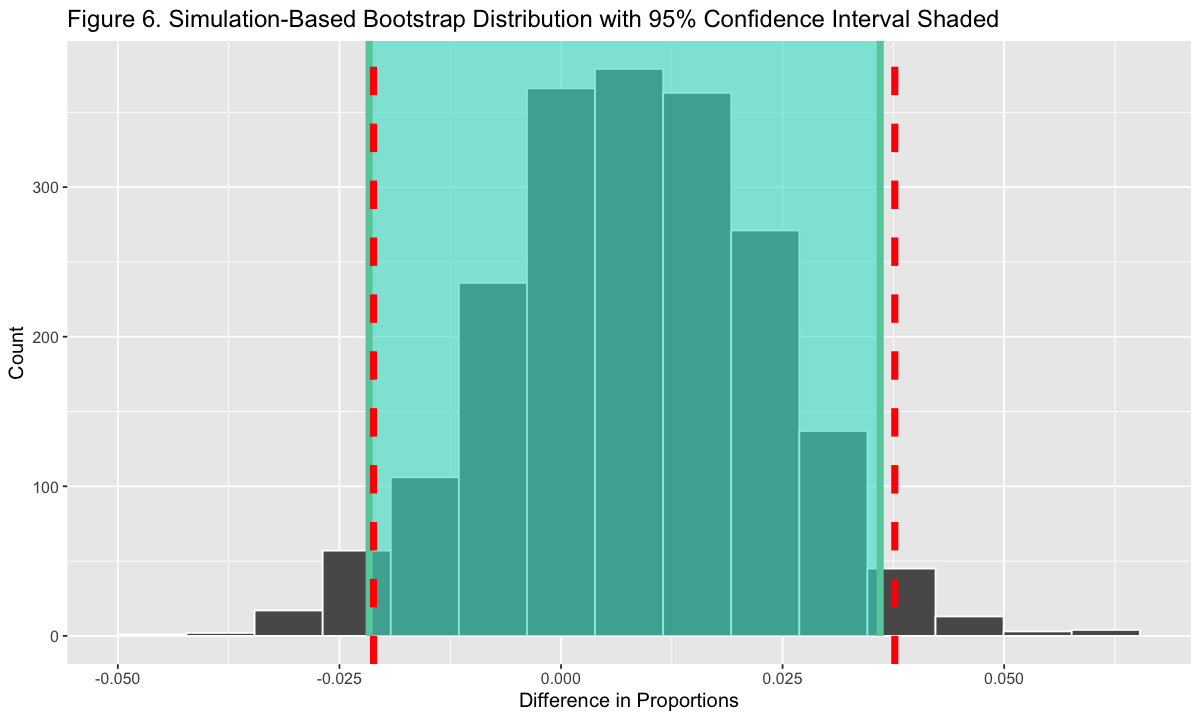

In [25]:
bootstrap_distribution <- crime_filtered %>%
    specify(type ~ neighbourhood, success = "theft") %>%
    generate(reps = 2000, type = "bootstrap") %>%
    calculate(stat = "diff in props", order = c("West Point Grey", "Dunbar-Southlands"))

percentile_ci <- bootstrap_distribution %>%
    get_confidence_interval(level = 0.95, type = 'percentile')

se_ci <- bootstrap_distribution %>% 
  get_confidence_interval(level = 0.95, type = "se", 
                          point_estimate = obs_prop_diff)

visualize(bootstrap_distribution) + 
    shade_confidence_interval(endpoints = percentile_ci) + 
    labs(x = "Difference in Proportions",
         y = "Count",
         title = "Figure 6. Simulation-Based Bootstrap Distribution with 95% Confidence Interval Shaded") + 
    theme(text = element_text(size = 12)) + 
    geom_vline(xintercept = pull(se_ci[1]), linetype = 'dashed', lwd = 2, colour = 'red') + 
    geom_vline(xintercept = pull(se_ci[2]), linetype = 'dashed', lwd = 2, colour = 'red')

The shaded portion represents the 95% confidence interval using the percentile method, while the other uses the standard error theory-based method.

Now that we have calculated the results for our research, let us summarize them in two tables. The first one shows the confidence intervals using both methods, while the latter shows the p-values.

In [26]:
types <- tibble(type = c("asymptotics", "bootstrap_percentile", "bootstrap_se"))
combined_ci <- rbind(prop_ci_asymptotics,
                  percentile_ci,
                  se_ci)

cbind(types, combined_ci)

type,lower_ci,upper_ci
<chr>,<dbl>,<dbl>
asymptotics,-0.02200745,0.03850946
bootstrap_percentile,-0.02164928,0.03601064
bootstrap_se,-0.02115698,0.03765899


**Table 5. Confidence interval comparison**

In [27]:
p_types <- tibble(type = c("asymptotics", "bootstrap"))
combined_p <- tibble(p_value = c(p_value_asymptotics, p_value_infer))

cbind(p_types, combined_p)

type,p_value
<chr>,<dbl>
asymptotics,0.2965147
bootstrap,0.3185000


**Table 6. P-value comparison**

Doing a quick comparison, we see that each of the 95% confidence intervals capture 0, and that all the intervals produced by the different methods have little deviation. We can then say across all 95% confidence intervals that could be calculated, we can expect that 95% of the intervals contain the true difference in theft crime proportions. Similarly, the p-value of using asymptotics and bootstrapping are both at approximately 0.3, which is significantly greater than the 5% significance level, so we fail to reject the null hypothesis. In other words, we do not have enough evidence to demonstrate that West Point Grey has a higher theft rate than Dunbar-Southlands, resulting in the possibility of committing a Type II Error.

Comparing the two methods, asymptotics analyze the sample dataset directly based on theoretical methods while bootstrapping is known to mimic the shape and spread of the sampling distribution itself, thus giving similar results since they both have the underlying goal of understanding the sampling distribution of the population. As seen above, the confidence intervals and p-value only differ slightly due to sampling variation. Since we ensured that the assumptions to use the Central Limit Theorem were met, it is expected that the bootstrapping and asymptotic methods should produce similar results. 

Although bootstrapping is very versatile and can be applied without any assumptions and conditions, asymptotics is preferred in our case. With a large sample size of over 1000 observations, theory-based method is not only accurate but also computationally inexpensive with only a few mathematical calculations, while the bootstrap approach relies more heavily on the given sample.

# 3. Discussion

### Summary
In our study of determining whether or not there is a statistically significant difference in the proportion of theft crime occurring in West Point Grey against Dunbar-Southlands, we fail to reject the null hypothesis stating there is no difference between the neighbourhoods at a significance level of 5%. Originally, we expected West Point Grey to have a higher proportion of theft compared to Dunbar-Southlands as the population density would be higher closer to campus, leading to a higher theft rate. However, both the asymptotic analysis based on the Central Limit Theorem and bootstrap analysis fail to reject the null hypothesis. We obtained confidence intervals containing the value of 0, or no difference, and achieved p-values of approximately 0.3. This means that using both the theory-based approach and simulation-based approach gave us the same conclusion, so we can be relatively confident in our answer.

### Significance
Our findings could impact residents living in either neighbourhoods, if not both, to be more proactive and aware of theft in their area and enforce relevant safety measures. Since we specifically targeted the neighbourhoods of West Point Grey and Dunbar-Southlands, two of the most popular neighbourhoods for off-campus housing pertaining to University of British Columbia students, then these students can become more informed on the theft proportions in these places. However, since we discovered no statistical significance between the two neighbourhoods in terms of theft proportion, then individuals should not be too wary of living in either neighbourhood.

### Further Questions
One drawback of our study is that while big data may explain differences in the danger of theft and support governmental measures, it cannot explain individual cases or provide a detailed plan of how to minimize risks. Furthermore, a challenge we face is how to extrapolate our analysis to predict future crime rates, as that is crucial for reducing crime rates. Despite not finding any statistical difference between the proportion of theft in West Point Grey and Dunbar-Southlands, we have further questions regarding the underlying motivations behind theft and what features cause a difference in theft between different neighbourhoods. Not only that, our research raises further questions into crimes not limited to just theft, but extended further to other crime types such as homicides or residential break-ins. 

Word count: 1870

# 4. References
Branch, Legislative Services. “Consolidated Federal Laws of Canada, Criminal Code.” Criminal Code, 27 July 2023, [laws-lois.justice.gc.ca/eng/acts/c-46/section-322.html](laws-lois.justice.gc.ca/eng/acts/c-46/section-322.html). 

Crime Statistics. “Crime Statistics.” Vancouver Police Department, 19 July 2023, [vpd.ca/crime-statistics/](vpd.ca/crime-statistics/). 

Government of Canada, Department of Justice. “State of the Criminal Justice System - 2019 Report.” Results by Outcome, 7 July 2021, [www.justice.gc.ca/eng/cj-jp/state-etat/2019rpt-rap2019/p7.html](www.justice.gc.ca/eng/cj-jp/state-etat/2019rpt-rap2019/p7.html). 

UBC. “Your Guide to Neighborhoods in Vancouver: UBC Vantage College.” Your Guide to Neighborhoods in Vancouver | UBC Vantage College, [vantagecollege.ubc.ca/blog/your-guide-neighborhoods-vancouver](vantagecollege.ubc.ca/blog/your-guide-neighborhoods-vancouver). Accessed 30 July 2023. 

Vancouver Police Department. “Vancouver Police Department Crime Data.” Accessed 30 July 2023. 